# Project
Cody Costa, David Loi, Tue Pham

#### import packages

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

#### Load UFO Sighting Data

In [291]:
data = pd.read_csv('ufo-data.csv', sep=',')
data.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation
0,Open,6/10/2024 3:15,La Pine,OR,USA,Orb,Orb shape that flickered or pulsed (visible to...,6/10/2024,NaN,NaN
1,Open,6/9/2024 17:20,New York,NY,USA,Sphere,silver sphere or disc hovering and rotating,6/10/2024,NaN,NaN
2,Open,6/9/2024 3:01,Satellite Beach,FL,USA,Oval,I saw an oblong shaped white object above to m...,6/9/2024,NaN,NaN
3,Open,6/9/2024 1:14,Coopersville,MI,USA,Light,"8-12 white lights in a straight, horizontal li...",6/9/2024,NaN,NaN
4,Open,6/8/2024 22:11,Boone,NC,USA,Cigar,Craft moved rapidly lighting up on and off,6/8/2024,NaN,NaN


In [292]:
data.shape

(2000, 10)

#### Distribution of data by US state

In [294]:
states = data['State']
states

0       OR
1       NY
2       FL
3       MI
4       NC
        ..
1995    OR
1996    OR
1997    OR
1998    OR
1999    OR
Name: State, Length: 2000, dtype: object

In [295]:
state_set = set(states)
len(state_set)

53

#### filter out state names that do not work

In [303]:
filter1 = data['State'] != '0'
filter2 = data['State'] != '-'

fil = filter1 * filter2
len(set(data[fil]['State']))

data = data[fil]

HEIGHT = data.shape[0]
WIDTH  = data.shape[1]

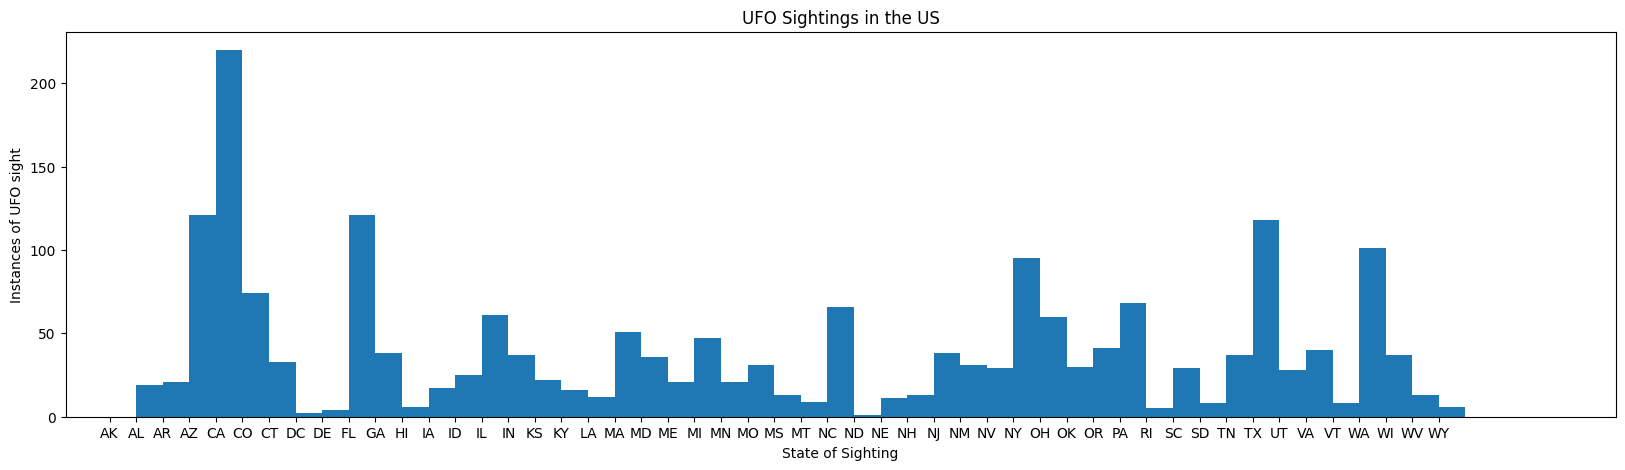

In [304]:
states = data['State']
bins = range(1, len(state_set) + 2)

plt.figure(figsize=[20, 5])
plt.hist(states.sort_values(), bins=bins)
plt.xlabel('State of Sighting')
plt.ylabel('Instances of UFO sight')
plt.title('UFO Sightings in the US')
plt.show()

#### Distribution of data over time in the US
Probably will get rid of this, not enough data in the set to compare time of year vs sightings

In [312]:
dates_occurred = data['Occurred']
print(type(dates_occurred[0]))
# filter by month only

months_occurred = []


for date in dates_occurred:
    month = ''
    for k, val in enumerate(date):
        if val == '/':
            break
        month += val
    months_occurred.append(int(month))

<class 'str'>


In [314]:
# bins = range(1, 14)

# plt.figure(figsize=[20, 5])
# plt.hist(months_occurred, bins=bins)
# plt.xlabel('Month')
# plt.ylabel('Instances of UFO sight')
# plt.title('Distribution of months when UFO\'s are spotted')
# plt.xticks(bins)
# plt.show()

#### Load IQ Score Data

In [ ]:
iq_data = pd.read_csv('iq-scores.csv', sep=',')
iq_data.head()

,Rank,State,Average I.Q.,Literacy Rate,Numeracy Rate,Average SAT Score
0,1,Massachusetts,104.3,0.827,0.749,1029
1,2,New Hampshire,104.2,0.885,0.809,1050
2,3,North Dakota,103.8,0.866,0.790,1212
3,4,Vermont,103.8,0.872,0.790,1095
4,5,Minnesota,103.7,0.869,0.796,1225


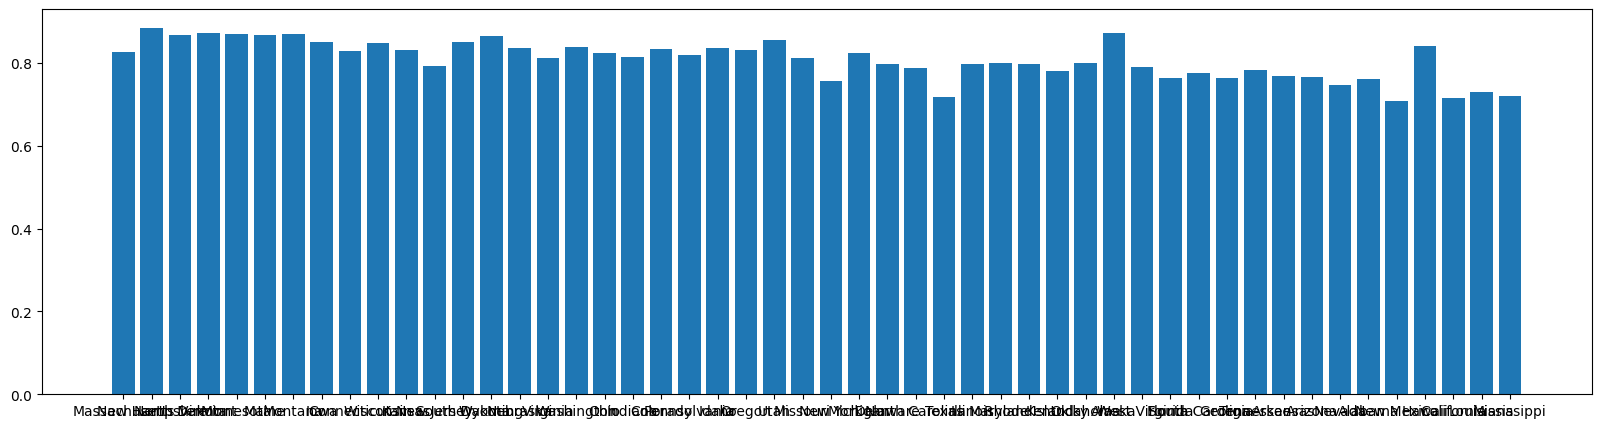

In [ ]:
plt.figure(figsize=[20, 5])
plt.bar(iq_data['State'], iq_data['Literacy Rate'])
plt.show()

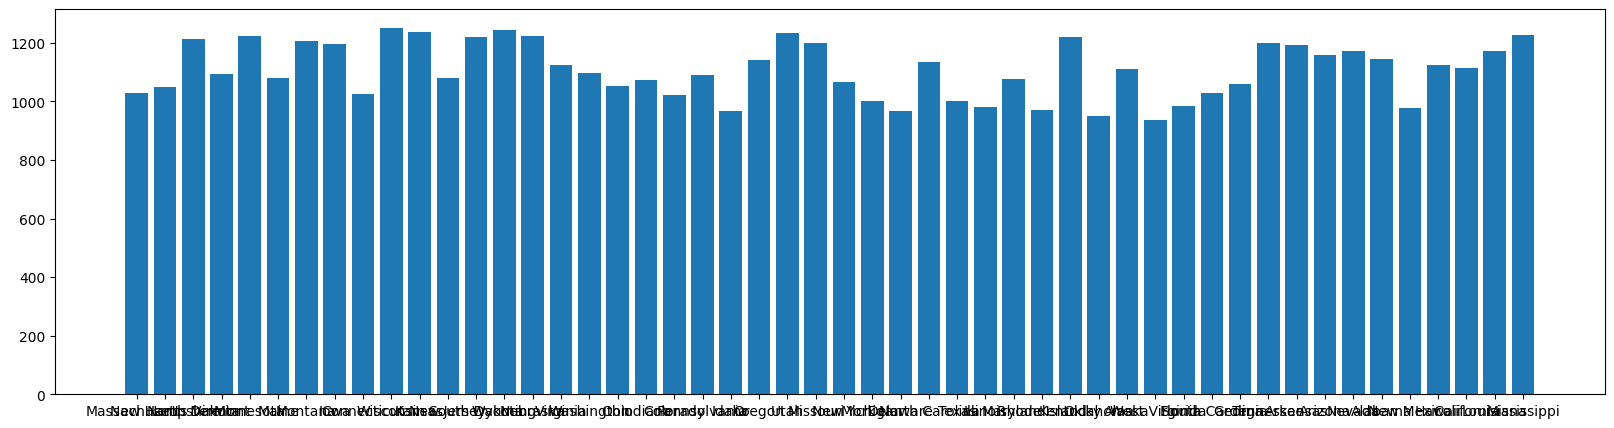

In [ ]:

plt.figure(figsize=[20, 5])
plt.bar(iq_data['State'], iq_data['Average SAT Score'])
plt.show()

#### Load Drug Use Data

In [ ]:
drug_data = pd.read_csv('drug-use-data.csv', sep='\t')
drug_data.head()

,Overall Rank,State,Total Score,Drug Use & Addiction Rank,Law Enforcement Rank,Drug Health Issues & Rehab Rank
0,1,New Mexico,69.89,1,13,2
1,2,West Virginia,63.56,5,3,18
2,3,Nevada,56.93,11,29,1
3,4,District of Columbia,56.61,3,31,3
4,5,Colorado,56.46,16,4,17


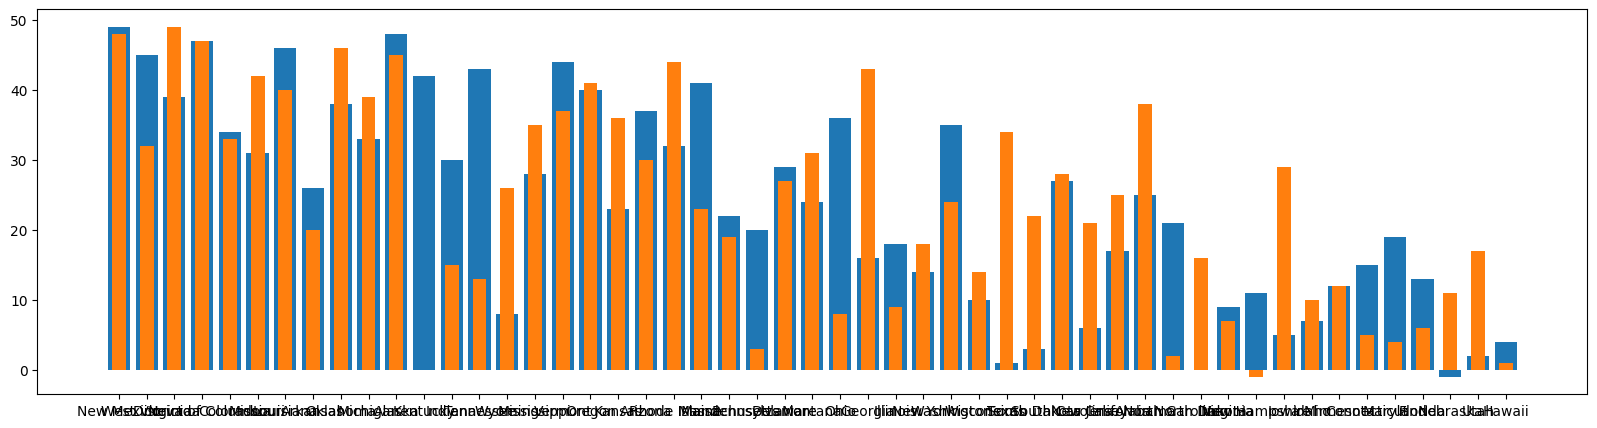

In [ ]:
plt.figure(figsize=[20, 5])
plt.bar(drug_data['State'], 50 - drug_data['Drug Use & Addiction Rank'])
plt.bar(drug_data['State'], 50 - drug_data['Drug Health Issues & Rehab Rank'], width=0.5)
plt.show()

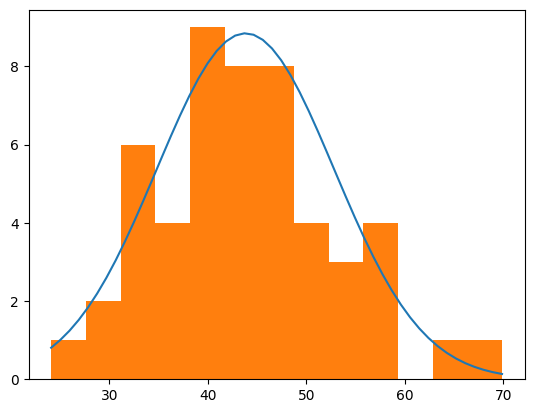

In [301]:
x = np.linspace(np.min(drug_data['Total Score']), np.max(drug_data['Total Score']))
plt.plot(x, 200 * stats.norm.pdf(x, np.mean(drug_data['Total Score']), np.std(drug_data['Total Score'])))

plt.hist(drug_data['Total Score'], bins=13)
plt.show()

#### Load State Population Data

TODO